In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import seaborn as sns

import yfinance as yf

plt.style.use('ggplot')

In [2]:
# use yfinance api to extract data. 
START = "2015-01-02"
END = "2022-05-31"
df = yf.download("AAPL F GM IVV MSFT GOOGL SPY BTC-USD", start=START, end=END)['Adj Close']
df.dropna(inplace=True)

[*********************100%***********************]  8 of 8 completed


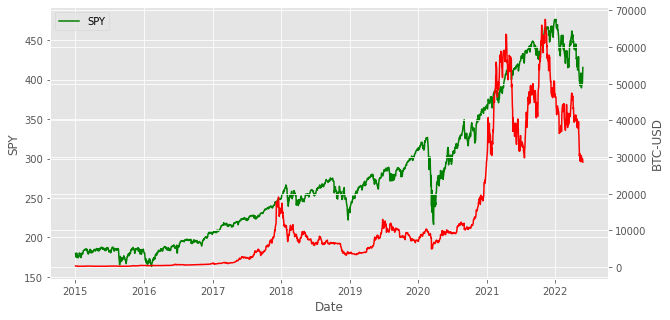

In [3]:
# plot the price movement

fig, ax1 = plt.subplots(figsize=(10,5))

col = 'SPY'
ax1.set_xlabel('Date')
ax1.set_ylabel(col)
ax1.plot(df.index, df[col], color='g', label=col)

col = 'BTC-USD'
ax2 = ax1.twinx()
ax2.set_ylabel(col)
ax2.plot(df.index, df[col], color='r', label=col)

ax1.legend()
plt.show()

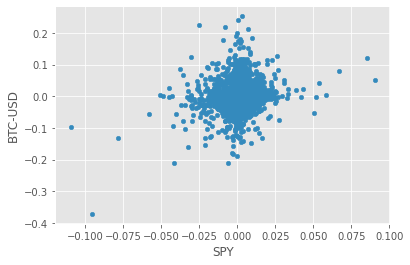

In [17]:
returns = df.pct_change()
returns.plot.scatter('SPY','BTC-USD')
plt.show()

In [5]:
returns.idxmin()

AAPL      2020-03-16
BTC-USD   2020-03-12
F         2020-03-16
GM        2020-03-18
GOOGL     2020-03-16
IVV       2020-03-16
MSFT      2020-03-16
SPY       2020-03-16
dtype: datetime64[ns]

<AxesSubplot:xlabel='Date'>

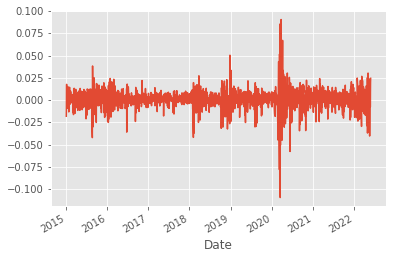

In [6]:
returns['SPY'].plot()

In [16]:
X = sm.add_constant(returns['SPY'])
y = returns['BTC-USD']

estimation = sm.OLS(y,X,missing='drop').fit()
estimation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BTC-USD   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     61.08
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           9.07e-15
Time:                        00:18:23   Log-Likelihood:                 3123.7
No. Observations:                1864   AIC:                            -6243.
Df Residuals:                    1862   BIC:                            -6232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.001      2.969      0.003       0.001       0.005
SPY            0.7191      0.092      7.816      0.000       0.539       0.900
==============================================================================
Omnibus:                      223.156   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1928.180
Skew:                           0.200   Prob(JB):                         0.00
Kurtosis:                       7.967   Cond. No.                         87.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
returns.std().to_frame().rename(columns={0:'vol'}).style.format('{:.2%}')

,vol
AAPL,1.85%
BTC-USD,4.60%
F,2.21%
GM,2.24%
GOOGL,1.71%
IVV,1.16%
MSFT,1.73%
SPY,1.14%


In [15]:
X = sm.add_constant(returns[['SPY','IVV']])
y = returns['BTC-USD']

estimation = sm.OLS(y,X,missing='drop').fit()
estimation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BTC-USD   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     30.90
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           6.27e-14
Time:                        00:18:02   Log-Likelihood:                 3124.0
No. Observations:                1864   AIC:                            -6242.
Df Residuals:                    1861   BIC:                            -6225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.001      2.978      0.003       0.001       0.005
SPY           -1.0927      2.123     -0.515      0.607      -5.256       3.070
IVV            1.7861      2.091      0.854      0.393      -2.314       5.886
==============================================================================
Omnibus:                      222.891   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1942.547
Skew:                           0.192   Prob(JB):                         0.00
Kurtosis:                       7.986   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
returns.corr().style.format('{:.2%}')

,AAPL,BTC-USD,F,GM,GOOGL,IVV,MSFT,SPY
AAPL,100.00%,13.47%,34.61%,36.54%,61.72%,74.76%,69.43%,74.83%
BTC-USD,13.47%,100.00%,9.52%,13.31%,13.55%,17.89%,15.07%,17.82%
F,34.61%,9.52%,100.00%,75.46%,34.36%,58.80%,35.36%,58.91%
GM,36.54%,13.31%,75.46%,100.00%,39.76%,61.31%,38.96%,61.33%
GOOGL,61.72%,13.55%,34.36%,39.76%,100.00%,73.79%,73.39%,73.99%
IVV,74.76%,17.89%,58.80%,61.31%,73.79%,100.00%,80.54%,99.91%
MSFT,69.43%,15.07%,35.36%,38.96%,73.39%,80.54%,100.00%,80.46%
SPY,74.83%,17.82%,58.91%,61.33%,73.99%,99.91%,80.46%,100.00%
